In [149]:
import pandas as pd
import numpy as ny
import seaborn as sns 
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [150]:
titanic = pd.read_csv('titanic-data.csv')

In [151]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [152]:
passengers = titanic['PassengerId'].unique()
num_passengers = len(passengers)
num_survived = titanic['Survived'].sum()

Text(0.5,1,u'Correlation of survived rate and passengers class')

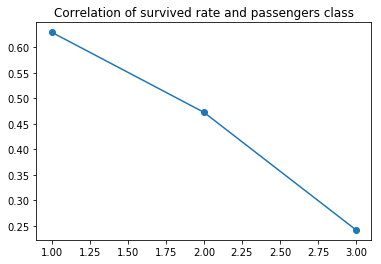

In [277]:
################################
#  1.correlation bertween survived rate and Pclass
################################

num_passengers_by_pclass = titanic.groupby('Pclass').count()['PassengerId']
num_surived_by_pclass = titanic.groupby('Pclass').sum()['Survived']
survived_rate_pclass = num_surived_by_pclass / num_passengers_by_pclass
plt.plot(survived_rate_pclass,marker='o')
# survived_rate_pclass.plot()
plt.title('Correlation of survived rate and passengers class')


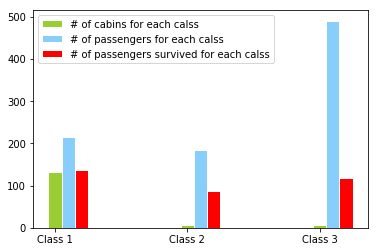

In [235]:
################################
#  2.correlation bertween survived rate,Pclass,Cabin
################################
num_cabins_by_pcalss = titanic.groupby('Pclass').Cabin.nunique()

x_names = ['Class 1','Class 2','Class 3']
x = np.arange(len(x_names))
plt.bar(x,num_cabins_by_pcalss,width = 0.1,facecolor = 'yellowgreen',edgecolor = 'white',label = '# of cabins for each calss')
plt.bar(x + 0.1,num_passengers_by_pclass,width = 0.1,facecolor = 'lightskyblue',edgecolor = 'white',label = '# of passengers for each calss')
plt.bar(x + 0.2,num_surived_by_pclass,width = 0.1,facecolor = 'red',edgecolor = 'white',label = '# of passengers survived for each calss')
plt.xticks(x,x_names)
plt.legend()

num_passengers: 891
num_passengers_in_cabin: 204
num_passengers_not_in_cabin: 687
num_survived_by_cabin: 136
num_survived_not_by_cabin: 206


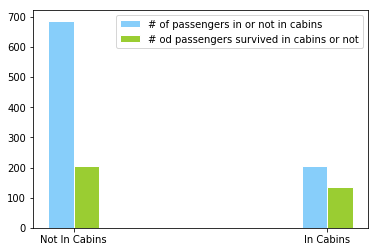

In [217]:
################################
#  3.correlation bertween survived rate and cabins
################################
num_passengers_by_cabin = titanic.groupby('Cabin').sum()
num_survived_by_cabin = num_passengers_by_cabin['Survived'].sum()
num_survived_not_by_cabin = num_survived - num_survived_by_cabin
num_passengers_in_cabin = titanic['Cabin'].count()
num_passengers_not_in_cabin = num_passengers - num_passengers_in_cabin
print 'num_passengers:',num_passengers
print 'num_passengers_in_cabin:',num_passengers_in_cabin
print 'num_passengers_not_in_cabin:',num_passengers_not_in_cabin
print 'num_survived_by_cabin:',num_survived_by_cabin
print 'num_survived_not_by_cabin:',num_survived_not_by_cabin

x_names = ['Not In Cabins','In Cabins']
x = np.arange(len(x_names))
y1 = [num_passengers_not_in_cabin,num_passengers_in_cabin]
y2 = [num_survived_not_by_cabin,num_survived_by_cabin]
plt.bar(x - 0.05,y1,width = 0.1,facecolor = 'lightskyblue',edgecolor = 'white',label = '# of passengers in or not in cabins')
plt.bar(x + 0.05,y2,width = 0.1,facecolor = 'yellowgreen',edgecolor = 'white',label = '# od passengers survived in cabins or not')
plt.xticks(x,x_names)
plt.legend()

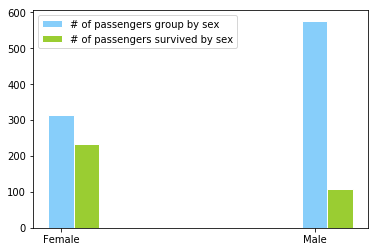

In [239]:
################################
#  4.correlation between sex and survived rate
################################

data_by_sex = titanic.groupby('Sex',as_index = False).count()
num_passengers_by_sex = data_by_sex['PassengerId']
num_passengers_survived_by_sex = titanic.groupby('Sex',as_index = False).sum()['Survived']

x_names = ['Female','Male']
x = np.arange(len(x_names))
plt.bar(x,num_passengers_by_sex,width = 0.1,facecolor = 'lightskyblue',edgecolor = 'white',label = '# of passengers group by sex')
plt.bar(x + 0.1,num_passengers_survived_by_sex,width = 0.1,facecolor = 'yellowgreen',edgecolor = 'white',label = '# of passengers survived by sex')
plt.xticks(x,x_names)
plt.legend()

In [241]:
################################
#  4.correlation between age and survived rate
################################

data_by_survived = titanic.groupby('Survived').mean()
data_by_survived

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


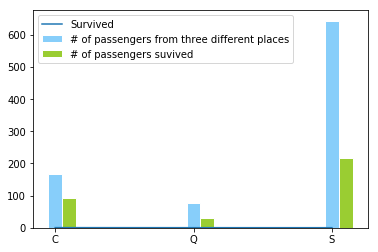

In [263]:
################################
#  5.correlation between Embarked and survived rate
################################
num_by_embarked = titanic.groupby('Embarked').count()['Survived']
num_survived_by_embarked = titanic.groupby('Embarked').sum()['Survived']

x_names = ['C','Q','S']
x = np.arange(len(x_names))
plt.bar(x,num_by_embarked,width = 0.1,facecolor = 'lightskyblue',edgecolor = 'white',label = '# of passengers from three different places')
plt.bar(x + 0.1,num_survived_by_embarked,width = 0.1,facecolor = 'yellowgreen',edgecolor = 'white',label = '# of passengers suvived')
plt.xticks(x,x_names)
plt.legend()

Text(0.5,1,u'Survived rate of different place')

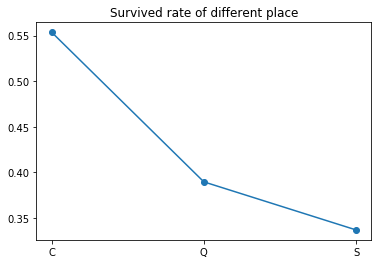

In [278]:
plt.plot(num_survived_by_embarked/num_by_embarked,marker='o')
plt.title('Survived rate of different place')

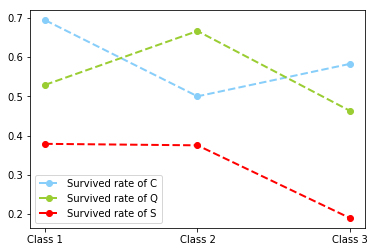

In [280]:
################################
#  5.1 Since passengers from Southampton have a lower survived rate, the next step is digging into it 
#      and finding possible reason
################################

# Check if it's related to pclass
num_by_embarked_pclass = titanic.groupby(['Embarked','Pclass'],as_index = False).count()
num_survived_by_embarked_pclass = titanic.groupby(['Embarked','Pclass'],as_index = False).sum()
survived_rate = num_survived_by_embarked_pclass['Survived'] / num_by_embarked_pclass['Survived']

x_names = ['Class 1','Class 2','Class 3']
x = np.arange(len(x_names))
c_rate = [survived_rate.iloc[0],survived_rate.iloc[3],survived_rate.iloc[6]]
q_rate = [survived_rate.iloc[1],survived_rate.iloc[4],survived_rate.iloc[7]]
s_rate = [survived_rate.iloc[2],survived_rate.iloc[5],survived_rate.iloc[8]]
plt.plot(x,c_rate,color = 'lightskyblue',linewidth=2,linestyle='dashed',marker='o',label = 'Survived rate of C')
plt.plot(x,q_rate,color = 'yellowgreen',linewidth=2,linestyle='dashed',marker='o',label = 'Survived rate of Q')
plt.plot(x,s_rate,color = 'red',linewidth=2,linestyle='dashed',marker='o',label = 'Survived rate of S')
plt.xticks(x,x_names)
plt.legend()